# Data Science Challenge

**_Autor:_** Faramiñán Adán

PizzaBytes wants to add five new pizzas to their offering, however they are struggling with deciding their prices. What they do know is that they want their pricing to be aligned as much as possible with their current products. Could you assist them in this endeavor using your data science skills?
Below you have a dataset consisting of 15 pizzas, the ingredients used, and their prices. Can you estimate the prices for the five new pizzas?

## Data Load

The pdf data was loaded. A spreadsheet were created with the data and a .csv file was generated. Considerations:
* Ingredients separated with a "+" were taken separately. Ex: ``"chicken + spicy pork"`` : ``"chicken"`` , ``"spicypork"``

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

data = pd.read_csv("datascience.csv", sep=' ;', header=0) #Read csv fil
data.columns = data.columns.str.replace(" ","") #Delete space from columns
data["ingredients"]= (data["ingredients"].str.replace("+",",")).str.replace(", ",",").str.replace(" ,",",") #Change + to ",", and remove spaces

data

,pizza_id,ingredients,price
0,pizza margherita,"mozzarella cheese,tomato sauce",16.99
1,farmhouse,"ham,mushrooms",18.99
2,hawaiian,"ham,pineapple",18.99
3,pepperoni,"double pepperoni,mozzarella",20.99
4,meat,"spicy pork,ham,pepperoni,seasoned minced beef",20.99
5,meaty one,"pepperoni,pork,beef,smoked bacon,chicken",20.99
6,bbq,"bbq sauce,bacon,chicken",20.99
7,chicken,"chicken,mushrooms,peppers,red onions",20.99
8,veggie,"mushrooms,peppers,red onions,tomato",18.99
9,meat combo,"pepperoni,pork,beef,smoked bacon,chicken,spicy...",54.99


The ingredients of all the pizzas were listed

In [2]:
df = pd.concat([data["price"], 
                pd.get_dummies(data['ingredients'].str.split(',', expand=True),  prefix='', prefix_sep='').sum(level=0, axis=1)], 
               axis=1)
for i in df.columns:
    print(i)

price
bbq
bbq sauce
beef
chicken
chillies
double pepperoni
green chillies
ham
mozzarella cheese
mushrooms
peperoni
pepperoni
peppers
red onions
spicy pork
bacon
jalapenos
mixed peppers
mozzarella
pineapple
pork
pork spicy
sliced black olives
sweetcorn
tomato sauce
mozarella
pork sausage
sliced
tomato
onions
seasoned beef
seasoned minced beef
smoked bacon


At this stage, the data engineers should have cleaned the dataset. However, errors were observed. These issues can be resolved with the data engineers through simple meetings to bring the bug to them. Because this is an evaluator problem, the data was corrected following my criteria.

Fixed:
* Double pepperoni = the word pepperoni is added twice
* Ingredients that are considered the same were joined
      * mozzarella cheese and mozzarella
      * bbq and bbq sauce
* and misspelled words
      * peperoni
      * mozarella

In [3]:
# iterative process to fix bugs of data
for m,i in enumerate(data["ingredients"]):
    ing = i.split(",")
    for n,j in enumerate(ing):
        if j == "peperoni":
            ing[n]= "pepperoni"      
        if j == "mozarella" or j == "mozzarella cheese":
            ing[n] = "mozzarella"
        if j == "bbq sauce":
            ing[n] = "bbq"
    data["ingredients"][m]= ','.join(ing)

The last step of this stage was to order the data to be used as input in the prediction algorithms.

In [4]:
df = pd.concat([data["price"], #Target
                pd.get_dummies(data['ingredients'].str.split(',', expand=True),  prefix='', prefix_sep='') #separate ingredients by comma
                .sum(level=0, axis=1)], #sum repeat ingredients
               axis=1).set_index(data["pizza_id"]) # add "pizza_id" as index
df


,price,bbq,beef,chicken,chillies,double pepperoni,green chillies,ham,mozzarella,mushrooms,...,sliced black olives,sweetcorn,tomato sauce,pork sausage,sliced,tomato,onions,seasoned beef,seasoned minced beef,smoked bacon
pizza_id,,,,,,,,,,,,,,,,,,,,,
pizza margherita,16.99,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
farmhouse,18.99,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
hawaiian,18.99,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
pepperoni,20.99,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
meat,20.99,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
meaty one,20.99,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
bbq,20.99,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chicken,20.99,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
veggie,18.99,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


Finally, the total ingredients were listed to observe the possible variables with greater weight in the algorithms.

In [5]:
dic = {}
for i in df.columns:
    dic[i] = df[i].sum()

pd.DataFrame.from_dict(dic, orient='index', columns = ['Total']).iloc[1:].sort_values("Total", ascending=False)


,Total
red onions,10.0
chicken,7.0
pepperoni,7.0
ham,6.0
mushrooms,6.0
jalapenos,4.0
beef,4.0
peppers,4.0
spicy pork,3.0
tomato,3.0


---

## Machine Learning Algorithms

The data was arranged to be used as input. The target and the features were defined.

In [6]:
df = df.dropna()   #delete NaN. This code removes the pizza_id without price.

In [7]:
#Target
target = 'price'

# features
feature_cols = [x for x in df.columns if x != target]


## *Random Forest*

The following code develops the [***Random Forest***](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) regression algorithm from [Scikit-Learn](https://scikit-learn.org/stable/index.html). The optimal hyperparameters were searched for the best performance.

In [8]:
#=========================================================================
#=============   Random Forest Regression (RF)    ========================
#=========================================================================

from sklearn.ensemble import RandomForestRegressor
import random
from sklearn.model_selection import GridSearchCV
    
def grid_RF(x_train, y_train):     
    #Random Forest function
    # X_train: Features
    # y_train: target

    random.seed(10)
    np.random.seed(10)


    # Number of trees in random forest
    n_estimators = [50, 100, 200]
    # Maximum number of levels in tree
    max_depth = [10, 30, 50]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    
    # Create the random grid
    param_grid = {'bootstrap': [True], # Method of selecting samples for training each tree
     'ccp_alpha': [0.0],
     'criterion': ['squared_error'],
     'max_depth': max_depth,
     'max_features': ['auto'], # Number of features to consider at every split
     'max_leaf_nodes': [None],
     'max_samples': [None],
     'min_impurity_decrease': [0.0],
     'min_samples_leaf': min_samples_leaf,
     'min_samples_split': min_samples_split,
     'min_weight_fraction_leaf': [0.0],
     'n_estimators': n_estimators,
     'n_jobs': [None],
     'oob_score': [False],
     'random_state': [None],
     'verbose': [0],
     'warm_start': [False]}

    RF = GridSearchCV(RandomForestRegressor(),param_grid,cv=5) # Define the grid
                                                              
    RF.fit(x_train, y_train)
    RF = RF.best_estimator_ # Choose the best estimator
    return RF

In [9]:
import time
import numpy as np
start = time.time()
RF = grid_RF(df[feature_cols],df[target])
end = time.time()
time_RF = end -start
print(RF) # this code print the best hyperparameters
print(f'Process time: {time_RF:0.3f} seconds')


RandomForestRegressor(max_depth=30, min_samples_split=5, n_estimators=50)
Process time: 53.275 seconds


Usually, to run these algorithms, you must have an N (amount of data) greater than 30. Due to the few data, the data was partitioned following the [K-Fold cross-validation method](https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation).

In [10]:
# Cross-validation for the best model with its respective hyperparameters
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import statistics

cv = KFold(n_splits=10, random_state=1, shuffle=True) 
mae_RF = cross_val_score(RF, df[feature_cols], df[target], scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1) # Mean absolute error
rmse_RF = cross_val_score(RF, df[feature_cols], df[target], scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1) # root mean squared error
score_RF = cross_val_score(RF, df[feature_cols], df[target], scoring='r2', cv=cv, n_jobs=-1)

print(f'{70*"="}\n\tRMSE={-np.mean(rmse_RF):0.3f} ,SD={statistics.stdev(rmse_RF):0.3f} \n{70*"="}')

	RMSE=5.717 ,SD=6.973 


### RF features importance

The Random Forest algorithm allows finding the most predominant variables in the predicted results.

It is incredibly complex to describe the results given the algorithm's "black box" nature. However, this procedure allows us to explain (in importance) part of the algorithm.

In [11]:
from sklearn.inspection import permutation_importance
#=========================

# get importance
importance1 = (RF.feature_importances_)

# plot feature importance

new  = pd.DataFrame([importance1,feature_cols,['RF' for x in range(len(feature_cols))]]).T
new['imp'], new['variable'],new['Model'] = new[0],new[1],new[2]
new = new.drop(columns=[0,1,2])
new = new.sort_values(by='imp', ascending=False, ignore_index = True)


Graph of the variable importance

Text(0.5, 1.0, 'Feature importance')

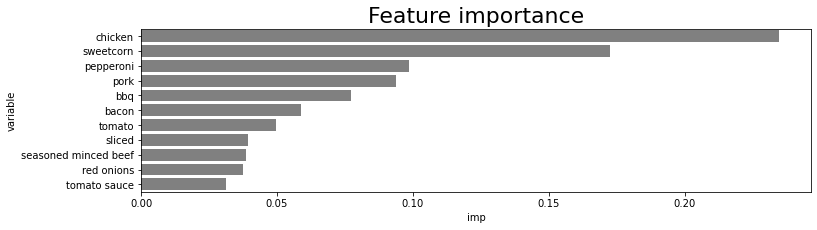

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots( figsize=(12,3))
#ax.set_xlabel('Importance')
d = sns.barplot(x='imp', y='variable',data = new.loc[:10], color = 'gray')
d.set_title('Feature importance',size = 22)
#cd.set_xscale("log")
#fig.savefig('ET_XGBR_imp'+str(gp)+'_'+y2+'.png', dpi=300)

## *Support Vector Regressor*

The following code develops the ***Support Vector Regressor*** algorithm. The optimal hyperparameters were searched for the best performance.

In [13]:
#=========================================================================
#=============  Support vector machine based regressor (SVR)     =========
#=========================================================================
    
def grid_SVR(x_train, y_train):
    import random
    random.seed(10)
    np.random.seed(10)

    from sklearn.svm import SVR
    param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
             'C' : [100,200,500],
             'degree' : [3,8],
             'coef0' : [0.01,0.1,0.5],
             'gamma' : ('auto','scale')},

    modelsvr = SVR(max_iter =2000)

    SVR = GridSearchCV(modelsvr,param,cv=5)

    SVR.fit(x_train, y_train)
    # Evaluation of the models

    SVR = SVR.best_estimator_
    return SVR


In [14]:
from ssl import SSLCertVerificationError
start = time.time()
SVR = grid_SVR(df[feature_cols],df[target])
end = time.time()
time_SVR = end -start
print(SVR)
print(f'Process time: {time_SVR:0.3f} seconds')    


SVR(C=100, coef0=0.01, max_iter=2000)
Process time: 2.933 seconds


In [15]:
# Cross-validation for the best model with its respective hyperparameters
cv = KFold(n_splits=10, random_state=1, shuffle=True)
mae_SVR = cross_val_score(SVR, df[feature_cols], df[target], scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
rmse_SVR = cross_val_score(SVR, df[feature_cols], df[target], scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
score_SVR = cross_val_score(SVR, df[feature_cols], df[target], scoring='r2', cv=cv, n_jobs=-1)
print(f'{70*"="}\n\tRMSE={-np.mean(rmse_SVR):0.3f} ,SD={statistics.stdev(rmse_SVR):0.3f} \n{70*"="}')

	RMSE=5.006 ,SD=6.865 


## Predict price

The prices of the new pizzas were predicted as below:

* bbq feast
* Supreme
* veggie
* mexico 
* rustico

It should be noted that the "veggie" pizza is already in the catalog, so a new name must be used.

**_Final considerations:__**

There are other algorithms besides the ones proposed here. They can be compared to neural networks, gradient boosting machines, among others. However, the applicability is very similar to the algorithms developed here.


The price of each pizza could be predicted, despite the significant error that the models have. This detail should be considered when presenting the result to the stakeholders.

It is observed that ``chicken`` and ``pepperoni`` raise the price of the pizza. Finally, the ``sweetcorn``, despite being added three times, also influences the price of the pizza.

In [16]:
new_df = pd.concat([data["price"], data['ingredients'].str.get_dummies(sep=',')], axis=1)[data["price"].isna()]
new_df["price"] = SVR.predict(new_df[feature_cols])

pd.DataFrame(list(new_df["price"]),columns = ["Price"],index=(data["pizza_id"][data["price"].isna()]))

,Price
pizza_id,
bbq feast,23.970629
supreme,24.509788
veggie,22.944294
mexico,23.095858
rustico,22.861570
